In [233]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
from scipy.interpolate import interp1d

**read** **in** **the** **data**

In [3]:
path = 'Observation/GZ2017.xlsx'

pm_week = pd.read_excel(path, sheet_name='GZ2017')
data = pd.read_excel('speciesGZ.xlsx')
GZ = data.iloc[:,1:10]

NS = pd.read_excel('Observation/speciesNS.xlsx')      # NS 113.6042, 22.74

In [4]:
GZ

,date,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT
0,2007-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
103,2017-08-01,19.937208,1.986781,0.336618,0.134627,1.013242,5.317807,8.006018,0.719653
104,2017-09-01,35.923039,4.707227,0.559164,0.326492,3.917853,9.650088,11.960715,1.348562
105,2017-10-01,30.931762,3.990456,0.477488,0.081881,1.160856,10.143957,10.207024,0.761580
106,2017-11-01,46.650971,6.183862,0.912709,0.643023,5.900408,12.119432,13.897145,1.843923


MEE sites

In [6]:
##  read in data from the MEE sites
## with hourly data for PM2.5 and NO2

path = '../data/全国空气质量/站点_20160101-20161231/filename.log'

with open(path, 'r') as file:
    log = file.read()


with open('../data/全国空气质量/站点_20170101-20171231/filename.log', 'r') as file:
    lg = file.read()


log[:24]



'china_sites_20160101.csv'

In [7]:
#print(log[:24], log[25:49], log[50:74])

In [8]:
# file = pd.read_csv(path + log[25:49])
# file

In [9]:
path = '../data/全国空气质量/站点_20170101-20171231/'

m = pd.DataFrame()

for i in range(0,365):
    file = pd.read_csv(path + lg[25*i : 25*i+24])
    for j in range(len(file)):
        if file['type'][j] == 'PM2.5':
            m = pd.concat([m, file.iloc[j]], axis=1)

In [10]:
m_so2 = pd.DataFrame()

path = '../data/全国空气质量/站点_20170101-20171231/'

for i in range(0,365):
    file = pd.read_csv(path + lg[25*i : 25*i+24])
    for j in range(len(file)):
        if file['type'][j] == 'SO2':
            m_so2 = pd.concat([m_so2, file.iloc[j]], axis=1)

In [11]:

MEEso2 = m_so2.T.iloc[:, 344:400]
MEEso2['date'] = pd.to_datetime(m_so2.T['date'], format='%Y%m%d')
MEEso2.set_index('date', inplace=True)

In [12]:
meanso2 = MEEso2.resample('M').mean()

1345A - 1400A  
(a.iloc[:, 344:399])

In [14]:

path = '../data/全国空气质量/站点_20160101-20161231/'

mee = pd.DataFrame()

for i in range(0,365):
    file = pd.read_csv(path + log[25*i : 25*i+24])
    for j in range(len(file)):
        if file['type'][j] == 'PM2.5':
            mee = pd.concat([mee, file.iloc[j]], axis=1)

In [15]:
# #MEE['date'] = mee.T['date']
# date = m.T['date']
# a = pd.to_datetime(date, format='%Y%m%d')
# a

In [45]:
date = mee.T['date']
date


1      20160101
16     20160101
31     20160101
46     20160101
61     20160101
         ...   
286    20161230
301    20161230
316    20161230
331    20161230
346    20161230
Name: date, Length: 8555, dtype: object

In [47]:
mee.T
#dat = m.T['date']
MEE = mee.T.iloc[:, 344:400]
MEE['date'] = pd.to_datetime(date, format='%Y%m%d')
MEE.set_index('date', inplace=True)
MEE

,1345A,1346A,1347A,1348A,1349A,1350A,1351A,1352A,1353A,1354A,...,1391A,1392A,1393A,1394A,1395A,1396A,1397A,1398A,1399A,1400A
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,71.0,62.0,NaN,55.0,64.0,68.0,49.0,64.0,72.0,72.0,...,60.0,51.0,47.0,47.0,54.0,46.0,28.0,NaN,42.0,NaN
2016-01-01,75.0,68.0,NaN,52.0,62.0,67.0,48.0,71.0,68.0,77.0,...,68.0,51.0,47.0,47.0,54.0,48.0,28.0,NaN,29.0,NaN
2016-01-01,83.0,74.0,NaN,51.0,63.0,78.0,51.0,82.0,62.0,69.0,...,63.0,51.0,47.0,47.0,55.0,52.0,28.0,NaN,44.0,NaN
2016-01-01,82.0,68.0,NaN,53.0,74.0,68.0,51.0,76.0,62.0,61.0,...,60.0,51.0,47.0,47.0,54.0,54.0,27.0,29.0,33.0,NaN
2016-01-01,81.0,73.0,NaN,56.0,81.0,64.0,52.0,76.0,60.0,63.0,...,58.0,52.0,47.0,50.0,56.0,55.0,26.0,30.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30,52.0,47.0,NaN,35.0,56.0,62.0,35.0,44.0,120.0,37.0,...,55.0,55.0,49.0,42.0,55.0,46.0,53.0,60.0,63.0,50.0
2016-12-30,64.0,53.0,NaN,38.0,64.0,53.0,40.0,49.0,93.0,40.0,...,67.0,59.0,51.0,46.0,66.0,49.0,59.0,68.0,67.0,52.0
2016-12-30,70.0,57.0,NaN,40.0,65.0,54.0,44.0,55.0,NaN,43.0,...,84.0,86.0,51.0,49.0,59.0,54.0,50.0,67.0,64.0,57.0


In [43]:
mee.T
d = m.T['date']
MEE17 = m.T.iloc[:, 344:400]
MEE17['date'] = pd.to_datetime(d, format='%Y%m%d')
MEE17.set_index('date', inplace=True)


In [ ]:
MEE17

In [49]:
'''
calculate the monthly mean
'''

mean = MEE.resample('M').mean()
mean
mean17 = MEE17.resample('M').mean()



read in the coordinates

In [52]:
path = '../data/全国空气质量/站点列表-2016.11.07起_副本.xlsx'

cord = pd.read_excel(path)
cord

,监测点编码,监测点名称,城市,经度,纬度
0,1001A,万寿西宫,北京,116.3660,39.8673
1,1002A,定陵,北京,116.1700,40.2865
2,1003A,东四,北京,116.4340,39.9522
3,1004A,天坛,北京,116.4340,39.8745
4,1005A,农展馆,北京,116.4730,39.9716
...,...,...,...,...,...
1492,2711A,农水大厦,五家渠,87.5475,44.1756
1493,2835A,四十中小,攀枝花,101.7227,26.5670
1494,2842A,湖里中学,厦门,118.0936,24.5058
1495,2845A,德盛苑,长治,113.1569,36.1912


In [54]:
co = cord.iloc[341:397,:]
CO = co.set_index('监测点编码')
CO.T

监测点编码,1345A,1346A,1347A,1348A,1349A,1350A,1351A,1352A,1353A,1354A,...,1391A,1392A,1393A,1394A,1395A,1396A,1397A,1398A,1399A,1400A
监测点名称,广雅中学,市五中,天河职幼,广东商学院,市八十六中,番禺中学,花都师范,市监测站,九龙镇镇龙,麓湖,...,南城西平,河南岸金山湖子站,下埔横江三路子站,江北云山西路子站,惠阳区承修路船湖子站,大亚湾管委会子站,睦岗子站,城中子站,坑口子站,七星岩子站
城市,广州,广州,广州,广州,广州,广州,广州,广州,广州,广州,...,东莞,惠州,惠州,惠州,惠州,惠州,肇庆,肇庆,肇庆,肇庆
经度,113.235,113.261,NaN,113.348,113.433,113.352,113.215,113.26,113.568,113.281,...,113.738333,114.4183,114.4053,114.4103,114.3244,114.5317,112.427,112.471,112.565,112.4722
纬度,23.1422,23.105,NaN,23.0916,23.105,22.9477,23.3917,23.1331,23.2783,23.1569,...,22.965833,23.0528,23.08,23.1142,22.8172,22.7422,23.0706,23.0528,23.1617,23.0786


In [56]:
CO.T.iloc[2,0]

113.235

In [58]:
mean.iloc[2,0]

47.513103448275864

In [60]:
for i in range(0,10):
    print(CO.T.iloc[2,i])

113.235
113.261
nan
113.348
113.433
113.352
113.215
113.26
113.568
113.281


In [130]:
PM17 = GZ.iloc[-12:, :]
#PM17
NS17 = NS.iloc[120:,1:10]

In [66]:
# path = '0.5x0.625/2017'

date = ['01','02','03','04','05','06','07','08','09','10','11','12']
file = [0] * len(date)
mod = [0] * (len(date))
for i in range(len(date)):
    #date[i]
    file[i] = '0.5x0.625/2017/GEOSChem.AerosolMass.2017'+date[i]+'01_0000z.nc4'     #Aerosol Mass

    mod[i] = xr.open_dataset(file[i])

In [67]:
date = ['01','02','03','04','05','06','07','08','09','10','11','12']
#date = ['01','02','03','04','05','06','07','08','09']
file = [0] * len(date)
data16 = [0] * (len(date))
for i in range(len(date)):
    #date[i]
    file[i] = '0.5x0.625/2016/GEOSChem.SpeciesConc.2016'+date[i]+'01_0000z.nc4'

    data16[i] = xr.open_dataset(file[i])

In [68]:
date = ['01','02','03','04','05','06','07','08','09','10','11','12']
#date = ['01','02','03','04','05','06','07','08','09']
file = [0] * len(date)
data17 = [0] * (len(date))
for i in range(len(date)):
    #date[i]
    file[i] = '0.5x0.625/2017/GEOSChem.SpeciesConc.2017'+date[i]+'01_0000z.nc4'

    data17[i] = xr.open_dataset(file[i])

In [ ]:
# for var_name in data17[2].variables:
#     print(var_name)

In [72]:
PM_mod = []

for i in range(len(mod)):
    PM_mod.append(mod[i]['PM25'].isel(time=0, lev=0))
    #PM_mod.append(mod[i]['PM25'].isel(lev=0))

In [74]:
SO2_mod = []

for i in range(len(mod)):
    SO2_mod.append(data17[i]['SpeciesConcVV_SO2'].isel(time=0, lev=0))

In [76]:
NH4_mod = []

for i in range(len(mod)):
    NH4_mod.append(data17[i]['SpeciesConcVV_NH4'].isel(time=0, lev=0))

NO3_mod = []

for i in range(len(mod)):
    NO3_mod.append(data17[i]['SpeciesConcVV_NIT'].isel(time=0, lev=0))

SO4_mod = []

for i in range(len(mod)):
    SO4_mod.append(data17[i]['SpeciesConcVV_SO4'].isel(time=0, lev=0))

In [78]:
# p17 = xr.open_dataset('0.5x0.625/2017/GEOSChem.AerosolMass.20170701_0000z.nc4')
# p17['PM25']

In [80]:
PM_mod[-1]

<xarray.DataArray 'PM25' (lat: 40, lon: 24)>
[960 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2017-12-01
    lev      float64 0.9925
  * lat      (lat) float64 10.0 10.5 11.0 11.5 12.0 ... 27.5 28.0 28.5 29.0 29.5
  * lon      (lon) float64 105.0 105.6 106.2 106.9 ... 117.5 118.1 118.8 119.4
Attributes:
    long_name:         Particulate matter with radii < 2.5 um
    units:             ug m-3
    averaging_method:  time-averaged

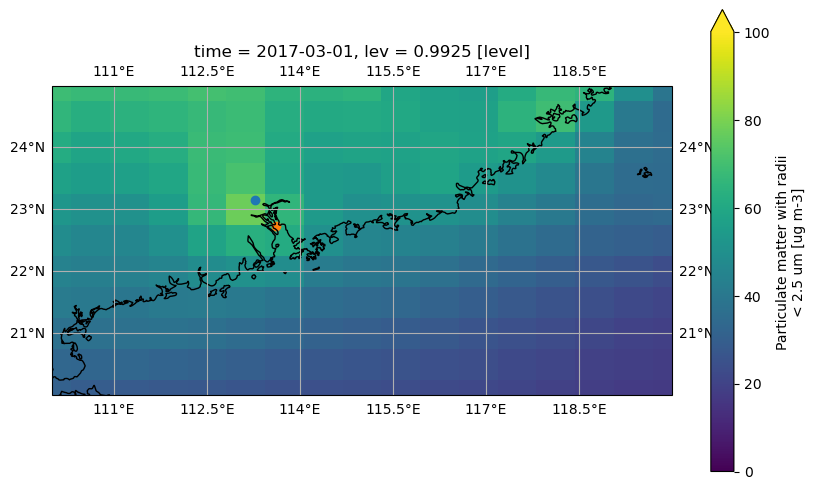

In [81]:
# Create a figure and axis with a specific projection
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data on the map
PM_mod[2].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', vmin=0, vmax=100)

# Add coastlines and gridlines
ax.set_extent([110,120, 20,25])
ax.coastlines()
ax.gridlines(draw_labels=True)

plt.scatter(113.27, 23.16)
plt.scatter(113.604, 22.74)   # NS
# plt.scatter(113.144, 23.0467)
# plt.scatter(113.738, 22.95)     # DG

# Show the plot
plt.show()


In [82]:
#x = oc17[i].sel(lon=113, lat=23, method='nearest')

In [83]:
mod17= []
for i in range(len(PM_mod)):
    #print(i)
    # a = PM_mod[-1].isel(time=0)
    x = PM_mod[i].sel(lon=113.2, lat=23.1, method='nearest')
    mod17.append(x)

Text(0.5, 1.0, 'PM2.5 concentration 2017')

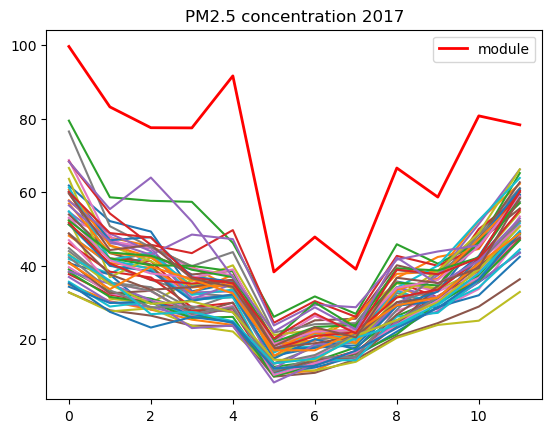

In [122]:
for i in range(0,56):
    plt.plot(t, mean17.iloc[:,i])
plt.plot(t,mod17, color = 'red',linewidth=2, label = 'module')
plt.legend()
plt.title('PM2.5 concentration 2017')



Text(0, 0.5, 'PM2.5 concentration')

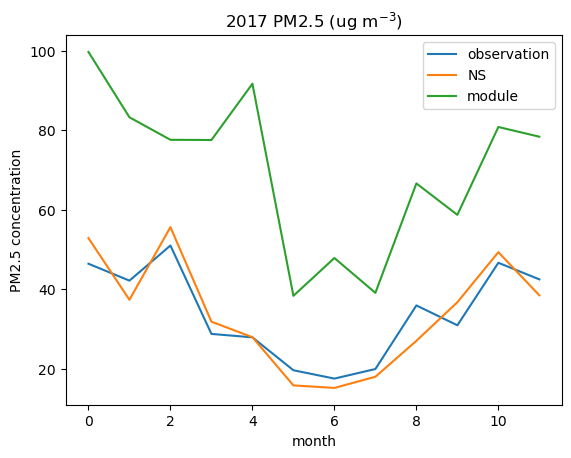

In [132]:
t = range(0,12)
plt.plot(range(0,12), PM17.iloc[:,1], label = 'observation')
plt.plot(range(0,12), NS17.iloc[:,1], label = 'NS')
plt.plot(t,mod17, label = 'module')


plt.legend()
plt.title('2017 PM2.5 (ug m$^{-3}$)')
plt.xlabel('month')
plt.ylabel('PM2.5 concentration')

In [134]:
res = []
for i in range(len(mod17)):
    res.append(mod17[i] - PM17.iloc[i,1])

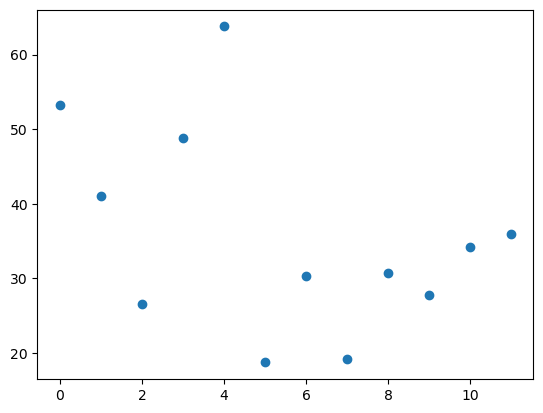

In [136]:
plt.scatter(t, res)

In [138]:
'''
plot colormap on top of colormap
'''

'\nplot colormap on top of colormap\n'

In [140]:
CO.T.iloc[2,3]

113.348

NameError: name 'mesh' is not defined

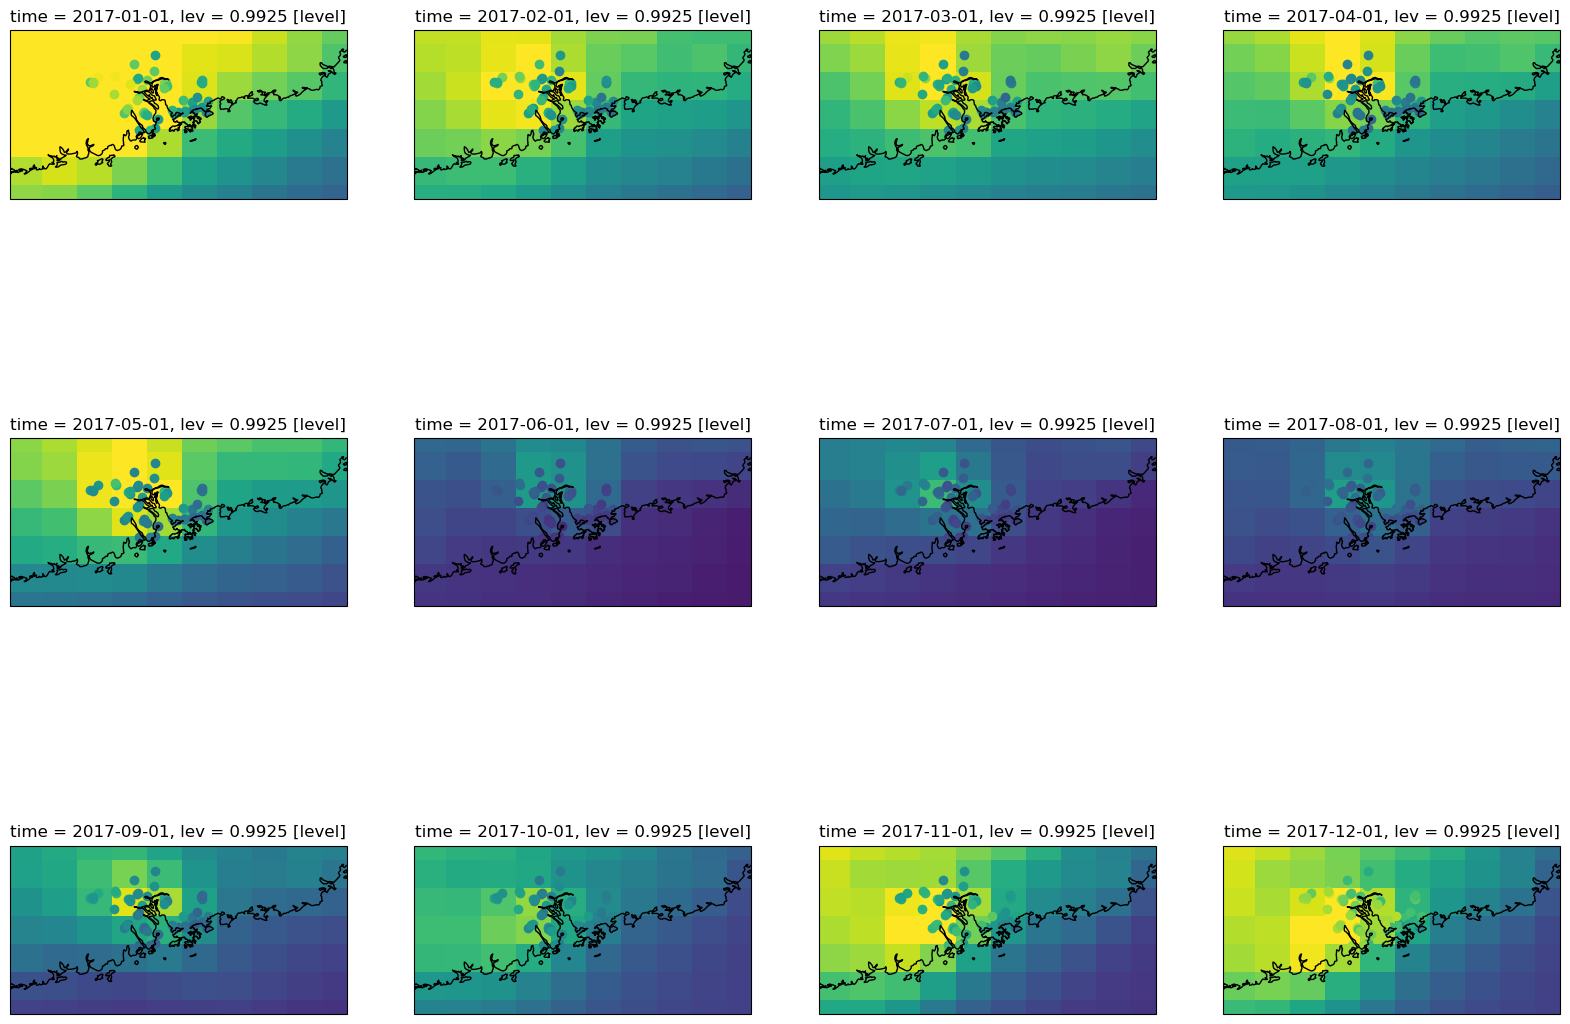

In [142]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})


# Plot each subplot
for i in range(12):
    # Flatten the axis array for ease of iteration
    axs = axs.flatten()
    ax = axs[i]
    
    # Plot the PM_mod data on the map
    PM_mod[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', vmin=0, vmax=70,add_colorbar=False)
    
    # Add coastlines and gridlines
    ax.set_extent([111, 117, 21, 24])
    ax.coastlines()
    #ax.gridlines(draw_labels=True)
    
    # Scatter plot the coordinates and mean values
    for j in range(4, 56):
        ax.scatter(CO.T.iloc[2, j], CO.T.iloc[3, j], c=mean17.iloc[i, j], cmap='viridis', vmin=0, vmax=70)


cbar = fig.colorbar(mesh, ax=axs, orientation='horizontal', fraction=0.02, pad=0.04)
cbar.set_label('Concentration (ug mol$^{-3}$)')
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

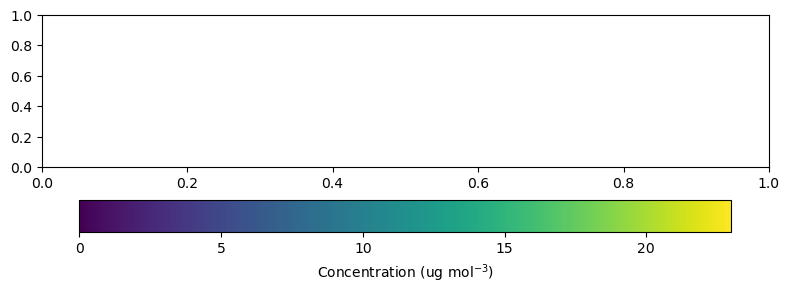

In [144]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Create a figure for the colorbar
fig, ax = plt.subplots(figsize=(8, 3))

norm = mcolors.Normalize(vmin=0, vmax=23)
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Create the colorbar
cbar = fig.colorbar(sm, orientation='horizontal', ax=ax)
cbar.set_label('Concentration (ug mol$^{-3}$)')

# Adjust layout
plt.tight_layout()

# Show the colorbar
plt.show()

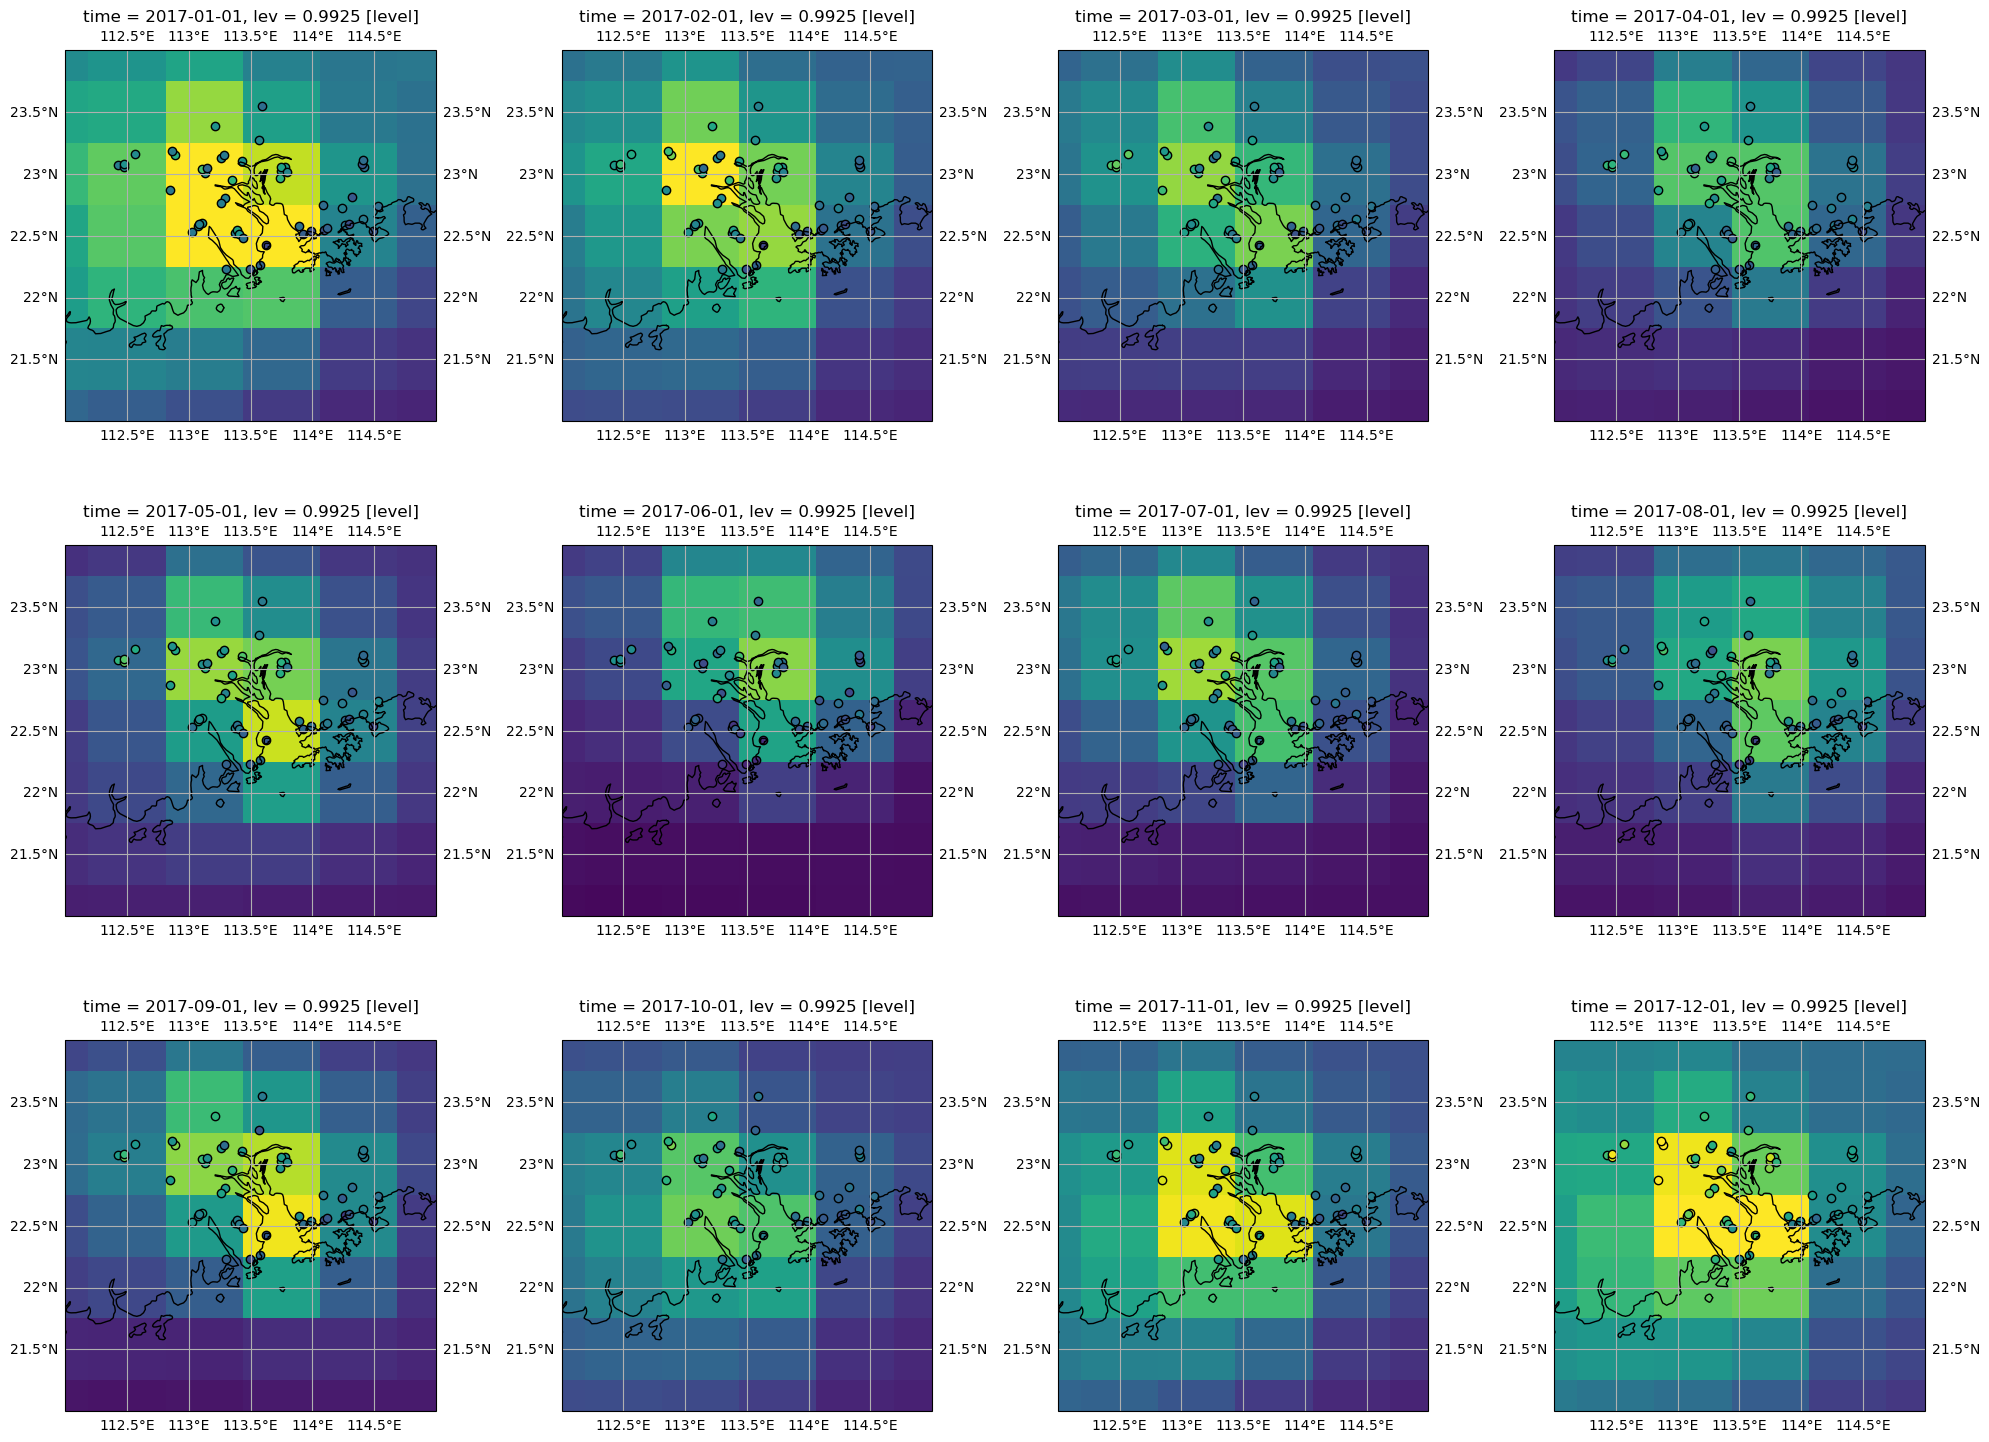

In [146]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})


# Plot each subplot
for i in range(12):
    # Flatten the axis array for ease of iteration
    axs = axs.flatten()
    ax = axs[i]
    
    # Plot the SO2_mod data on the map
    mesh = (SO2_mod[i]*(64/22.4)*1e9).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', vmax=23,add_colorbar=False)
    
    # Add coastlines and gridlines
    ax.set_extent([112, 115, 21, 24])
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    
    # Scatter plot the coordinates and mean values
    for j in range(4, 56):
        ax.scatter(CO.T.iloc[2, j], CO.T.iloc[3, j], c=meanso2.iloc[i, j], cmap='viridis', vmin=0, vmax=23, edgecolor='black')


# cbar = fig.colorbar(mesh, ax=axs, orientation='horizontal', fraction=0.02, pad=0.04)
# cbar.set_label('Concentration (ug mol$^{-3}$)')
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [147]:
#meanso2

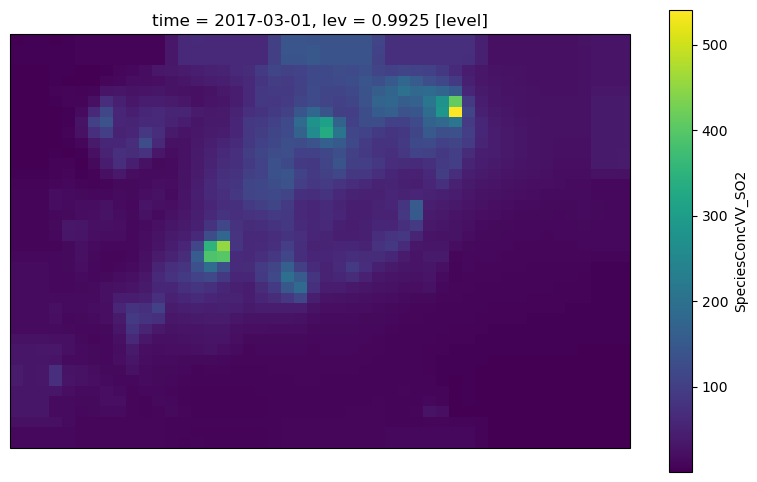

In [148]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

(SO2_mod[2]*(64/22.4)*10e9).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')
plt.show()

In [226]:
NH4_mod 

NO3_mod 

SO4_mod[2]

<xarray.DataArray 'SpeciesConcVV_SO4' (lat: 40, lon: 48)>
[1920 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2017-03-01
    lev      float64 0.9925
  * lat      (lat) float64 15.0 15.5 16.0 16.5 17.0 ... 32.5 33.0 33.5 34.0 34.5
  * lon      (lon) float64 100.0 100.6 101.2 101.9 ... 127.5 128.1 128.8 129.4
Attributes:
    long_name:         Concentration of species SO4
    units:             mol mol-1 dry
    averaging_method:  time-averaged

In [155]:
# plt.scatter(113.27, 23.16)
# plt.scatter(113.604, 22.74)   # NS
# # plt.scatter(113.144, 23.0467)
# # plt.scatter(113.738, 22.95)     # DG

# GZ, NS17

In [157]:
PM_mod[2]

<xarray.DataArray 'PM25' (lat: 60, lon: 48)>
[2880 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2017-03-01
    lev      float64 0.9925
  * lat      (lat) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... 27.5 28.0 28.5 29.0 29.5
  * lon      (lon) float64 100.0 100.6 101.2 101.9 ... 127.5 128.1 128.8 129.4
Attributes:
    long_name:         Particulate matter with radii < 2.5 um
    units:             ug m-3
    averaging_method:  time-averaged

In [159]:
pm= []
for i in range(len(PM_mod)):
    #print(i)
    # a = PM_mod[-1].isel(time=0)
    #x = PM_mod[i].sel(lon=113.2, lat=23.61, method='nearest')
    #x = PM_mod[i].sel(lon=114, lat=22.61, method='nearest')
    x = PM_mod[i].sel(lon=113.125, lat=22, method='nearest')
    pm.append(x)

so2= []
for i in range(len(SO2_mod)):
    #print(i)
    # a = PM_mod[-1].isel(time=0)
    #x = SO2_mod[i].sel(lon=114.2, lat=22.61, method='nearest')
    x = SO2_mod[i].sel(lon=113.125, lat=22, method='nearest')
    so2.append(x*(64/22.4)*1e9)

In [161]:
#mean17.iloc[:,11:22]
#mean17.iloc[:,11:22]

In [163]:
###  meanso2, mean17

'''  113.2, 23.61 '''
# 1345A, 1355A


'  113.2, 23.61 '

Text(0.5, 1.0, '2017 PM2.5 (ug m$^{-3}$)')

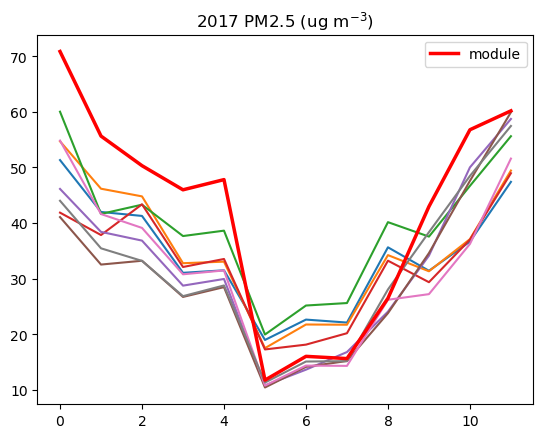

In [165]:
pm= []
for i in range(len(PM_mod)):
    #print(i)
    # a = PM_mod[-1].isel(time=0)
    x = PM_mod[i].sel(lon=113.1, lat=22, method='nearest')
    pm.append(x)


plt.plot(t,mean17['1348A'])
plt.plot(t,mean17['1349A'])
plt.plot(t,mean17['1350A'])
plt.plot(t,mean17['1354A'])
plt.plot(t,mean17['1368A'])
plt.plot(t,mean17['1370A'])
plt.plot(t,mean17['1374A'])
plt.plot(t,mean17['1382A'])
plt.plot(t,pm, label = 'module', color='red', linewidth=2.5)

plt.legend()
plt.title('2017 PM2.5 (ug m$^{-3}$)')
# plt.xlabel('month')
# plt.ylabel('PM2.5 concentration')

Text(0.5, 1.0, '2017 SO2 (ug m$^{-3}$)')

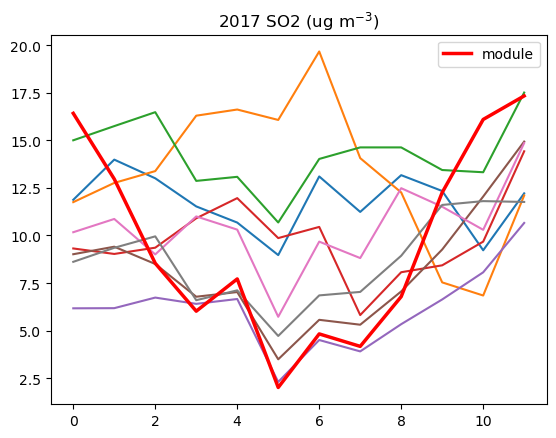

In [167]:
so2= []
for i in range(len(SO2_mod)):
    #print(i)
    # a = PM_mod[-1].isel(time=0)
    x = SO2_mod[i].sel(lon=113.1, lat=22, method='nearest')
    so2.append(x*(64/22.4)*1e9)


plt.plot(t,meanso2['1348A'])
plt.plot(t,meanso2['1349A'])
plt.plot(t,meanso2['1350A'])
plt.plot(t,meanso2['1354A'])
plt.plot(t,meanso2['1368A'])
plt.plot(t,meanso2['1370A'])
plt.plot(t,meanso2['1374A'])
plt.plot(t,meanso2['1382A'])
plt.plot(t,so2, label = 'module', color='red', linewidth=2.5)

plt.legend()
plt.title('2017 SO2 (ug m$^{-3}$)')
# plt.xlabel('month')
# plt.ylabel('PM2.5 concentration')

Text(0, 0.5, 'PM2.5 concentration')

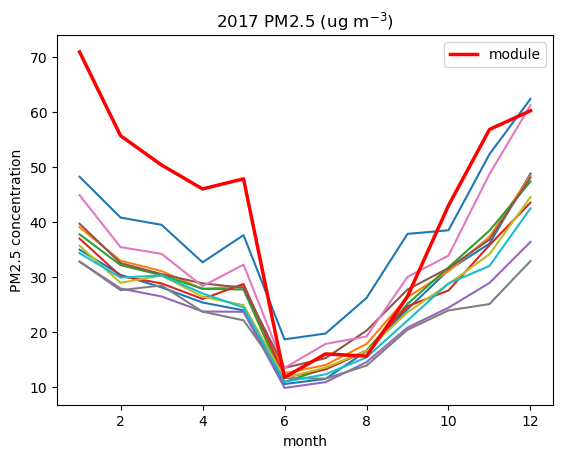

In [169]:
t = range(1,13)
plt.plot(t, mean17.iloc[:,11:22])
#plt.plot(t, mean17.iloc[:,:11])  #, label = 'observation')
# plt.plot(t, NS17.iloc[:,1], label = 'NS')
plt.plot(t,pm, label = 'module', color='red', linewidth=2.5)


plt.legend()
plt.title('2017 PM2.5 (ug m$^{-3}$)')
plt.xlabel('month')
plt.ylabel('PM2.5 concentration')

Text(0, 0.5, 'PM2.5 concentration')

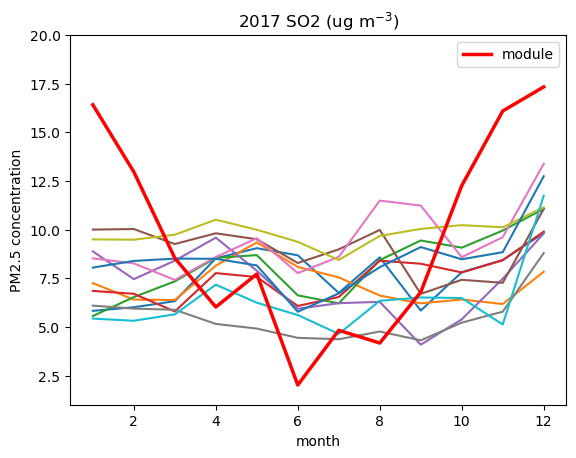

In [171]:
plt.plot(t, meanso2.iloc[:,11:22])#, label = 'observation')
# plt.plot(t, NS17.iloc[:,1], label = 'NS')
plt.plot(t,so2, label = 'module', color='red', linewidth=2.5)


plt.legend()
plt.title('2017 SO2 (ug m$^{-3}$)')
plt.xlabel('month')
plt.ylim(1,20)
plt.ylabel('PM2.5 concentration')

In [173]:
nh4= []
for i in range(len(NH4_mod)):
    #print(i)
    # a = PM_mod[-1].isel(time=0)
    x = NH4_mod[i].sel(lon=113.2, lat=23.61, method='nearest')
    nh4.append(x)

no3= []
for i in range(len(NO3_mod)):
    #print(i)
    # a = PM_mod[-1].isel(time=0)
    x = NO3_mod[i].sel(lon=113.2, lat=23.61, method='nearest')
    no3.append(x)

so4= []
for i in range(len(SO4_mod)):
    #print(i)
    # a = PM_mod[-1].isel(time=0)
    x = SO4_mod[i].sel(lon=113.2, lat=23.61, method='nearest')
    so4.append(x)

In [175]:
# convert units:

for i in range (len(so4)):
    
    so4[i] = so4[i]*(64/22.4)*1e9
    no3[i] = no3[i]*(62/22.4)*1e9
    nh4[i] = nh4[i]*(18/22.4)*1e9

In [177]:
###  this is for mol/mol

# t= range(0,12)
# plt.bar(t,so4, label='SO4')
# plt.bar(t,no3, label = 'NO3', bottom = so4)
# plt.bar(t, nh4, label = 'NH4', bottom = [sum(x) for x in zip(so4, no3)])

# plt.legend()
# plt.title('moduled SNA (2017)')
# plt.ylabel('mol mol$^{-1}$')
# plt.xlabel('month')

Text(0.5, 0, 'month')

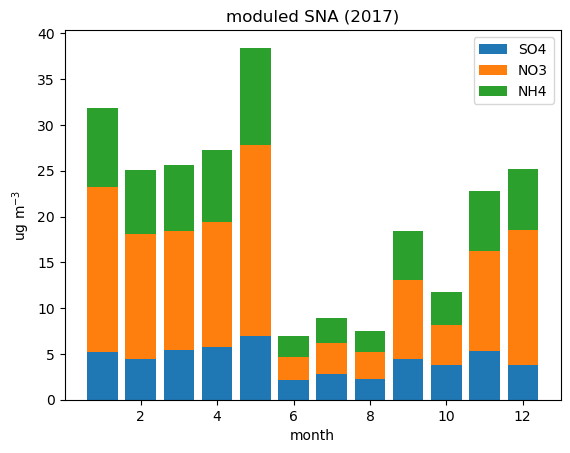

In [179]:
t= range(1,13)
plt.bar(t,so4, label='SO4')
plt.bar(t,no3, label = 'NO3', bottom = so4)
plt.bar(t, nh4, label = 'NH4', bottom = [sum(x) for x in zip(so4, no3)])

plt.legend()
plt.title('moduled SNA (2017)')
plt.ylabel('ug m$^{-3}$')
plt.xlabel('month')

In [181]:
for i in range(5,8):
    #print(i)
    jja = so4[i]+no3[i]+nh4[i]

for i in range(10,12):
    #print(i)
    djf = so4[i]+no3[i]+nh4[i]

print((jja/3)/(djf/2))


<xarray.DataArray ()>
array(0.19866859)
Coordinates:
    lev      float64 0.9925
    lat      float64 23.5
    lon      float64 113.1


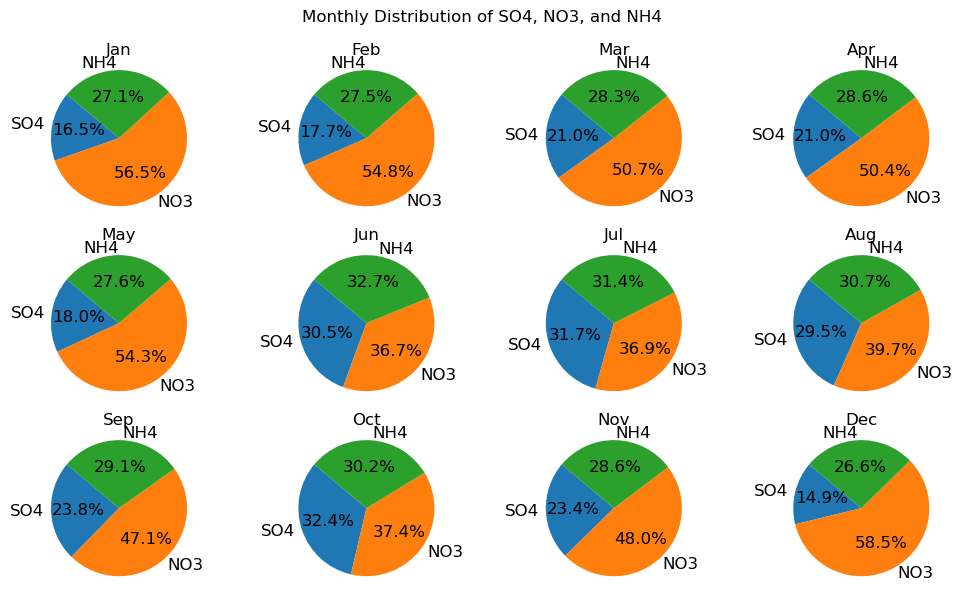

In [183]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create subplots for each month
fig, axs = plt.subplots(3, 4, figsize=(10, 6))

# Flatten the axis array for ease of iteration
axs = axs.flatten()

# Iterate over each month and plot the pie chart
for i, month in enumerate(months):
    sizes = [so4[i], no3[i], nh4[i]]
    labels = ['SO4', 'NO3', 'NH4']

    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    axs[i].set_title(month)

plt.suptitle('Monthly Distribution of SO4, NO3, and NH4')
plt.tight_layout()
plt.show()

In [185]:
GZ17 = GZ.iloc[-12:, :]

(0.0, 40.0)

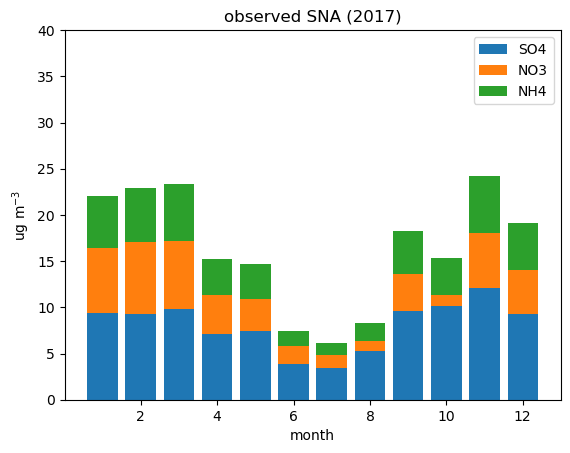

In [187]:
plt.bar(t, GZ17['SO4='], label='SO4')
plt.bar(t, GZ17['NO3-'], label = 'NO3', bottom = GZ17['SO4='])
plt.bar(t, GZ17['NH4+'], label = 'NH4', bottom = [sum(x) for x in zip(GZ17['SO4='], GZ17['NO3-'])])

plt.legend()
plt.title('observed SNA (2017)')
plt.ylabel('ug m$^{-3}$')
plt.xlabel('month')
plt.ylim(0,40)

In [189]:
for i in range(5,8):
    print(i)
    jja = GZ17['SO4='].iloc[i]+GZ17['NO3-'].iloc[i]+GZ17['NH4+'].iloc[i]

for i in range(10,12):
    print(i)
    djf = GZ17['SO4='].iloc[i]+GZ17['NO3-'].iloc[i]+GZ17['NH4+'].iloc[i]

print((jja/3)/(djf/2))

5
6
7
10
11
0.28927319276067187


In [191]:
GZ17['SO4=']

96      9.362988
97      9.256291
98      9.768008
99      7.085326
100     7.485911
101     3.911960
102     3.452835
103     5.317807
104     9.650088
105    10.143957
106    12.119432
107     9.281174
Name: SO4=, dtype: float64

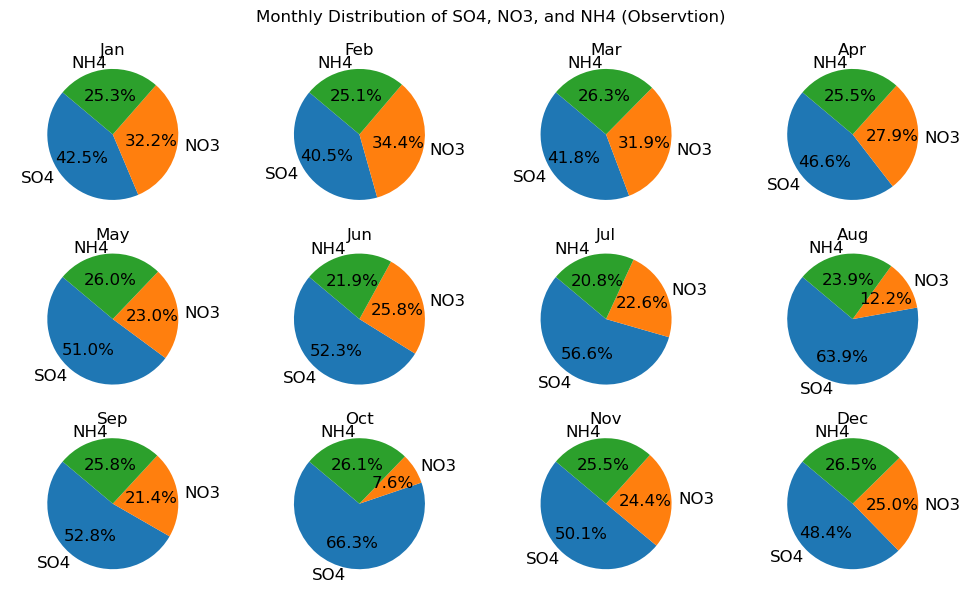

In [193]:
# Create subplots for each month
fig, axs = plt.subplots(3, 4, figsize=(10, 6))

# Flatten the axis array for ease of iteration
axs = axs.flatten()

# Iterate over each month and plot the pie chart
for i, month in enumerate(months):
    sizes = [GZ17['SO4='].iloc[i], GZ17['NO3-'].iloc[i], GZ17['NH4+'].iloc[i]]
    labels = ['SO4', 'NO3', 'NH4']

    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    axs[i].set_title(month)

plt.suptitle('Monthly Distribution of SO4, NO3, and NH4 (Observtion)')
plt.tight_layout()
plt.show()

In [208]:
PM17['NO3-']

96     7.097130
97     7.863226
98     7.443996
99     4.244747
100    3.378955
101    1.933222
102    1.376419
103    1.013242
104    3.917853
105    1.160856
106    5.900408
107    4.800568
Name: NO3-, dtype: float64

Text(0, 0.5, 'PM2.5 concentration')

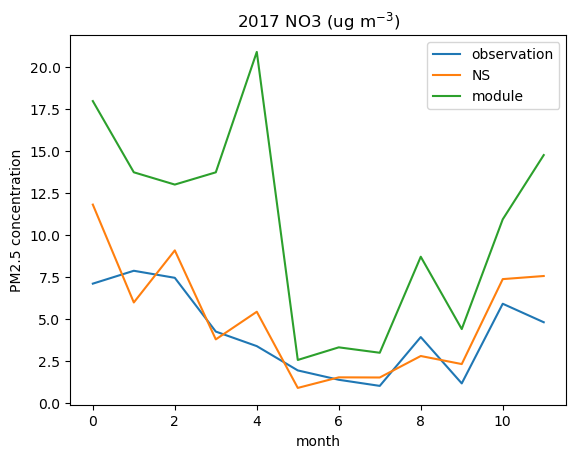

In [220]:
t = range(0,12)
plt.plot(range(0,12), PM17['NO3-'], label = 'observation')
plt.plot(range(0,12), NS17['NO3-'], label = 'NS')
plt.plot(t,no3, label = 'module')
# for i in range(0,12):
#     plt.plot(t,no3[i], label = 'module')


plt.legend()
plt.title('2017 NO3 (ug m$^{-3}$)')
plt.xlabel('month')
plt.ylabel('PM2.5 concentration')

In [ ]:
[so4[i], no3[i], nh4[i]]

Text(0, 0.5, 'PM2.5 concentration')

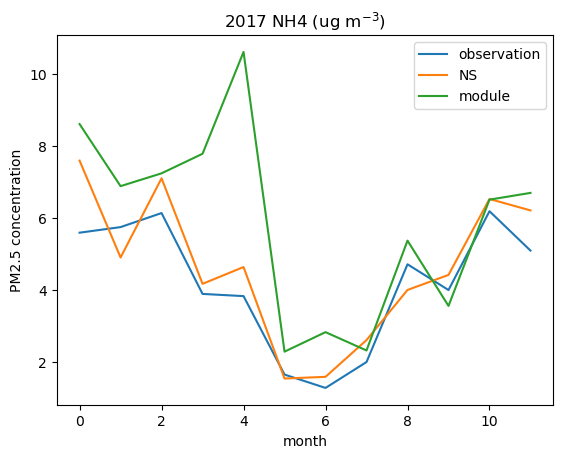

In [222]:
plt.plot(range(0,12), PM17['NH4+'], label = 'observation')
plt.plot(range(0,12), NS17['NH4+'], label = 'NS')
plt.plot(t,nh4, label = 'module')
# for i in range(0,12):
#     plt.plot(t,no3[i], label = 'module')


plt.legend()
plt.title('2017 NH4 (ug m$^{-3}$)')
plt.xlabel('month')
plt.ylabel('PM2.5 concentration')